# HIV Model

Megan Ku

In [11]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [12]:
#Define initial state variables

R = 200
L = 0
E = 0
V = 0.0000004

#time step - don't use 1!
dt = 0.01
t_0 = 0
t_end = 120



'''#Just a function that I put here and there when I want to reset the state
def reset_state():
    state = State(R = 200,
                  L = 0,
                  E = 0,
                  V = 0.0000004)

    #R = activated, uninfected CD4 lymphocytes
    #L = latently infected cells
    #E = actively infected cells
    #V = Virions

    return state
init = reset_state()'''

init = State(R = 200,
              L = 0,
              E = 0,
              V = 0.0000004)

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [13]:
Γ = 1.36
μ = 1.36 * (10 ** (-3))
τ = 0.2
β = 0.00027
ρ = 0.1
α = 3.6 * (10 ** (-2))
σ = 2
δ = 0.33
π = 100
#values given in HIV paper

100

In [52]:
'''
dR_dt = (Γ * τ) - (μ * R) - (β * R * V)
dL_dt = (ρ * β * R * V) - (μ * L) - (α * L)
dE_dt = (1 - ρ) * (β * R * V) + (α * L) - (δ * E)
dV_dt = (π * E) - (σ * V)
'''

#defining the system (the rates for the model)
system = System(init=init,
                t_0=t_0,
                t_end=t_end,
                dt = dt,
                Γ=Γ, 
                μ=μ,
                τ=τ,
                β=β,
                ρ=ρ,
                α=α,
                σ=σ,
                δ=δ,
                π=π)


,values
init,R 2.000000e+02 L 0.000000e+00 E 0.000...
t_0,0
t_end,120
dt,0.01
Γ,1.36
μ,0.00136
τ,0.2
β,0.00027
ρ,0.1
α,0.036


In [59]:
def update_func(state, t, system):
    unpack(system)
    unpack(state)
    
    dR_dt = (Γ * τ) - (μ * R) - (β * R * V)
    dL_dt = (ρ * β * R * V) - (μ * L) - (α * L)
    dE_dt = (1 - ρ) * (β * R * V) + (α * L) - (δ * E)
    dV_dt = (π * E) - (σ * V)
    
    newR = R + dR_dt * dt
    newL = L + dL_dt * dt
    newE = E + dE_dt * dt
    newV = V + dV_dt * dt

    return State(R = newR, L = newL, E = newE, V = newV)
    '''
    Updates the state variable
    state = State var
    system = System var
    newR = new value for R
    newL = new value for L
    newE = new value for E
    newV = new value for V
    output:state variable with updated values
        
    '''

In [60]:
#state = reset_state()
sample = update_func(init, t_0, system)
#checking to make sure it works!

,values
R,2.000000e+02
L,2.160000e-11
E,1.944000e-10
V,3.920000e-07


In [61]:
def run_simulation(state, system):    
    time_frame = TimeFrame(columns=state.index)
    time_frame.row[0] = state 
    for i in linrange(system.t_0, system.t_end, system.dt):
        time_frame.row[i+system.dt] = update_func(time_frame.row[i], t_0, system)
    return time_frame
    '''
    Runs the HIV infection simulation
    state = State variable
    system = System variable
    times = integer; duration of infection period
    
    returns TimeFrame
    '''

In [62]:
HIV_attack = run_simulation(init, system)

,R,L,E,V
0.00,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
0.01,200.000000,2.160000e-11,1.944000e-10,3.920000e-07
0.02,200.000000,4.275993e-11,3.842783e-10,3.843544e-07
0.03,200.000000,6.349909e-11,5.698218e-10,3.770516e-07
0.04,200.000000,8.383616e-11,7.512113e-10,3.700804e-07
0.05,200.000000,1.037892e-10,9.286215e-10,3.634300e-07
0.06,200.000000,1.233756e-10,1.102221e-09,3.570900e-07
0.07,200.000000,1.426124e-10,1.272174e-09,3.510504e-07
0.08,200.000000,1.615158e-10,1.438638e-09,3.453016e-07
0.09,200.000000,1.801018e-10,1.601765e-09,3.398342e-07


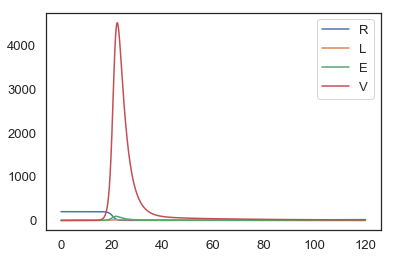

In [63]:
HIV_attack.plot()

In [64]:
import numpy as np
import matplotlib.pyplot as plt
# need to import in order to graph on log scale

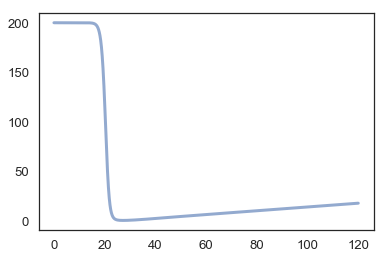

In [65]:
plot(HIV_attack.index, HIV_attack.R)
#not graphed on log scale

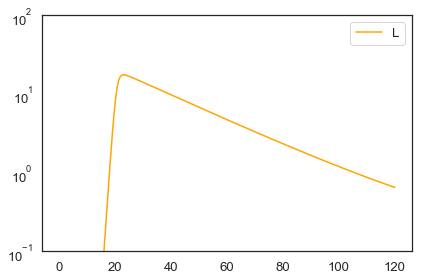

In [66]:
plt.semilogy(HIV_attack.index, HIV_attack.L, "orange")
decorate(ylim=[.1,100])
#graph on semilog scale; y lim in place so y-axis doesnt go haywire

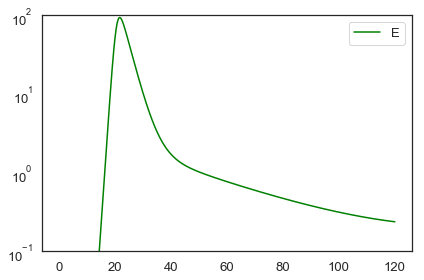

In [67]:
plt.semilogy(HIV_attack.index, HIV_attack.E, "green")
decorate(ylim=[.1,100])
#semilog plot, y-axis limit for same reason

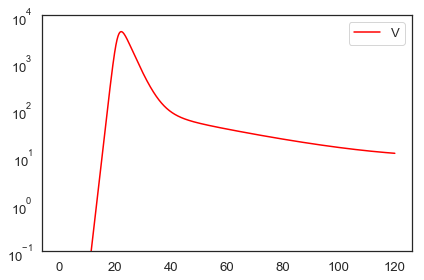

In [68]:
plt.semilogy(HIV_attack.index, HIV_attack.V, "red")
decorate(ylim=[.1,10000])
#larger magnitude values, still semilog scale

In [69]:
def slope_func(state, t, system):
    unpack(system)
    R, L, E, V = state
    
    dR_dt = (Γ * τ) - (μ * R) - (β * R * V)
    dL_dt = (ρ * β * R * V) - (μ * L) - (α * L)
    dE_dt = (1 - ρ) * (β * R * V) + (α * L) - (δ * E)
    dV_dt = (π * E) - (σ * V)

    return dR_dt, dL_dt, dE_dt, dV_dt
    '''
    Updates the state variable
    state = State var
    system = System var

    output:new rates
    '''


In [70]:
results, details = run_ode_solver(system, slope_func, max_step = 0.1)
details

,values
sol,None
t_events,[]
nfev,7208
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


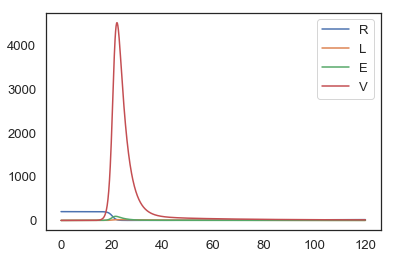

In [71]:
results.plot()